## Project 2 Submission

Please fill out:
* Student name: Anni Liu
* Instructor name: Hardik Idnani


In [1]:
# Import libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from scipy.stats import pearsonr, f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
import pickle

In [2]:
# Import data

data=pd.read_csv(r'C:\Users\AnnieLiu\Desktop\dsc-phase-2-project\data\kc_house_data.csv')

In [3]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Data Cleaning & EDA

In [5]:
data.shape

(21597, 21)

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19221.0,7.595859e-03,8.682485e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21534.0,2.338627e-01,7.656862e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [8]:
data.sort_values("price")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15279,40000362,5/6/2014,78000.0,2,1.00,780,16344,1.0,0.0,0.0,1,5,780,0.0,1942,NaN,98168,47.4739,-122.280,1700,10387
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,NaN,0.0,2,4,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,NaN,0.0,1,5,730,0.0,1943,0.0,98168,47.4808,-122.315,860,9000
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0.0,0.0,3,6,860,0.0,1954,0.0,98146,47.4987,-122.341,1140,11250
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0.0,0.0,2,5,520,0.0,1951,0.0,98168,47.4799,-122.296,1572,10570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,3,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,3,13,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,3,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,3,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449


In [9]:
data.sort_values("price", ascending=False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,3,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,3,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,3,13,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,3,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1.0,NaN,4,12,5000,2390.0,1991,0.0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1.0,4.0,3,12,5990,2020.0,1999,0.0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1.0,4.0,3,12,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1.0,4.0,3,12,6350,290.0,2004,0.0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0.0,0.0,3,12,6430,0.0,2001,0.0,98004,47.6208,-122.219,3720,14592


In [10]:
data.sort_values("price", ascending=False).tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13743,1788900230,7/22/2014,86500.0,3,1.00,840,9480,1.0,0.0,0.0,3,6,840,0.0,1960,0.0,98023,47.3277,-122.341,840,9420
10242,2422049104,9/15/2014,85000.0,2,1.00,830,9000,1.0,0.0,0.0,3,6,830,0.0,1939,0.0,98032,47.3813,-122.243,1160,7680
16700,1322049150,3/5/2015,85000.0,2,1.00,910,9753,1.0,0.0,0.0,3,5,910,0.0,1947,0.0,98032,47.3897,-122.236,1160,7405
3763,1523049188,4/30/2015,84000.0,2,1.00,700,20130,1.0,0.0,0.0,3,6,700,0.0,1949,0.0,98168,47.4752,-122.271,1490,18630
18453,7999600180,5/29/2014,83000.0,2,1.00,900,8580,1.0,0.0,0.0,3,5,900,0.0,1918,0.0,98168,47.4727,-122.270,2060,6533
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0.0,0.0,2,5,520,0.0,1951,0.0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0.0,0.0,3,6,860,0.0,1954,0.0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,NaN,0.0,1,5,730,0.0,1943,0.0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,NaN,0.0,2,4,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500
15279,40000362,5/6/2014,78000.0,2,1.00,780,16344,1.0,0.0,0.0,1,5,780,0.0,1942,NaN,98168,47.4739,-122.280,1700,10387


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [12]:
# Check for missing values
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [13]:
# Summary of data columns

data.view.describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [14]:
# Replace null values in 'view' with median 
data.view = data.view.fillna(value=data.view.median())

In [15]:
data.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [16]:
data.waterfront.describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [17]:
# Replace with null (most properties were not waterfront anyways)
data.waterfront=data.waterfront.fillna(value=data.waterfront.median())

In [18]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [19]:
# Drop unnecessary columns
data = data.drop(['id','sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)

In [20]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1955
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1951
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,1933
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1965
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,2009
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2014
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,2009
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,2004


C:\Users\AnnieLiu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

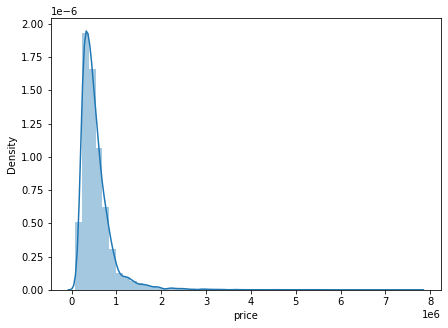

In [21]:
plt.figure(figsize= (7,5))
sns.distplot(data['price'])


Most properties sub $1mil

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

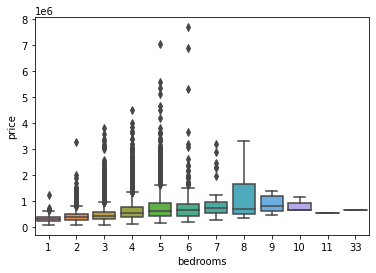

In [22]:
sns.boxplot(x='bedrooms', y='price', data=data)

C:\Users\AnnieLiu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

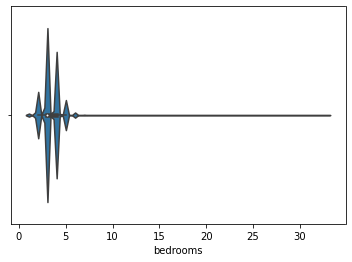

In [23]:
# 33 bedrooms seems excessive, let's have a closer look

plt.figure(figsize=(6,4))
sns.violinplot(data.bedrooms)

In [24]:
# Looks like most bedrooms are scattered between 1-6

In [25]:
# Determine outliers

data.bedrooms.sort_values(ascending=False).head(10)

15856    33
8748     11
13301    10
19239    10
15147    10
6073      9
4231      9
16830     9
8537      9
4092      9
Name: bedrooms, dtype: int64

In [26]:
data.bedrooms.sort_values(ascending=False).tail(5)

12472    1
13316    1
7010     1
3578     1
14373    1
Name: bedrooms, dtype: int64

In [27]:
# Check data for larger bedrooms i.e. 33, 11 and 10 bedrooms
print(data.loc[[15856]]) # Unlikely to fit 33 bedrooms in 6000 sqft_lot
print(data.loc[[8748]]) # Unlikely to fit 11 bedroom in 4960 sqft_lot
print(data.loc[[13301]])
print(data.loc[[19239]]) #Unlikely to fit 10 bedroom in 3745 sqft_lot
print(data.loc[[15147]])
print(data.loc[[14373]])

            date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15856  6/25/2014  640000.0        33       1.75         1620      6000   

       floors  waterfront  view  condition  grade  yr_built  
15856     1.0         0.0   0.0          5      7      1947  
           date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
8748  8/21/2014  520000.0        11        3.0         3000      4960     2.0   

      waterfront  view  condition  grade  yr_built  
8748         0.0   0.0          3      7      1918  
            date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
13301  8/14/2014  1150000.0        10       5.25         4590     10920   

       floors  waterfront  view  condition  grade  yr_built  
13301     1.0         0.0   2.0          3      9      2008  
             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
19239  12/29/2014  660000.0        10        3.0         2920      3745   

       floors  waterfront  view 

In [28]:
# Drop the unlikely rows from index

df = data.drop(data.index[[15856,8748,19239]])
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1955
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1951
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,1933
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1965
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,2009
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2014
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,2009
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,2004


Date impact on other variables such as price and waterfront properties.

In [29]:
# Date conversion

df['date'] = pd.to_datetime(df['date'])

In [30]:
# Date conversion to month to assess seasonsability effects

df['month_sold'] = df['date'].dt.month

In [31]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,month_sold
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1955,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1951,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,1933,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1965,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1987,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,2009,5
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2014,2
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,2009,6
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,2004,1


### Assumptions of linear regression

C:\Users\AnnieLiu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


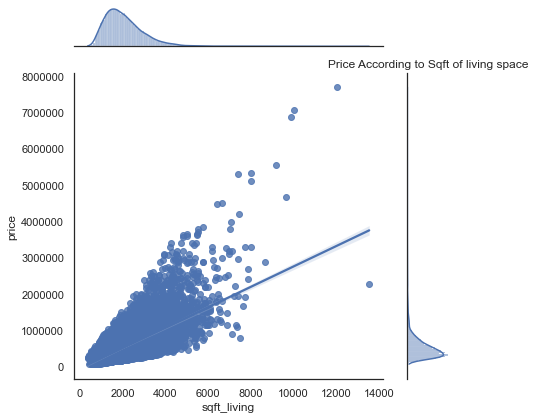

In [79]:
# examining the relationship between sqft_living and price
sns.jointplot('sqft_living','price', data=df, kind='reg')
plt.title("Price According to Sqft of living space")
plt.tight_layout()
plt.ticklabel_format(style='plain')


Sqft living and price have high positive correlation. Statistical test to confirm using Pearson's Correlation Coefficient as there are two continuous variables.

In [33]:
corr = pearsonr(df.sqft_living, df.price)
corr

(0.701949326358472, 0.0)

0.7 strong correlation - Apply feature in our model.

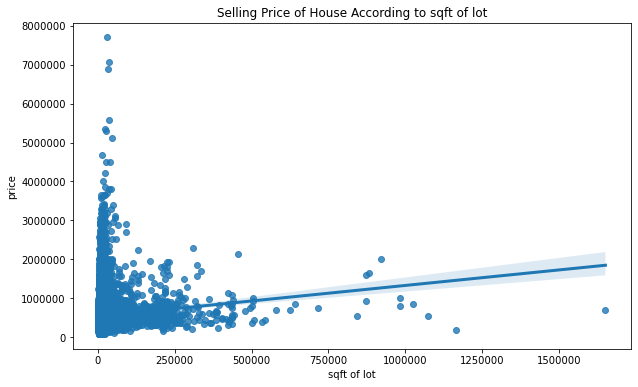

In [34]:
# Does the same for the entire property size? 

fig, ax = plt.subplots(figsize=(10,6))
plt.style.use('bmh')
sns.regplot(data=df, x='sqft_lot', y='price')

ax.set_xlabel('sqft of lot', fontsize=10)
ax.set_ylabel('price', fontsize=10)
ax.set_title('Selling Price of House According to sqft of lot', fontsize=12)
ax.ticklabel_format(style='plain')

Larger property size does not equate to a higher price. Not much correlation between property size and sales either.

In [35]:
new_corr = pearsonr(df.sqft_lot, df.price)
new_corr

(0.0898832559024816, 5.5626777243553564e-40)

Very weak, closer to no correlation at all.

### Feature engineering

Generate new features that could assist with final model predictions.

##### Feature 1: 'Month' sold vs price relationship

[Text(1, 0, 'Jan'),
 Text(2, 0, 'Feb'),
 Text(3, 0, 'Mar'),
 Text(4, 0, 'Apr'),
 Text(5, 0, 'May'),
 Text(6, 0, 'Jun'),
 Text(7, 0, 'Jul'),
 Text(8, 0, 'Aug'),
 Text(9, 0, 'Sept'),
 Text(10, 0, 'Oct'),
 Text(11, 0, 'Nov'),
 Text(12, 0, 'Dec')]

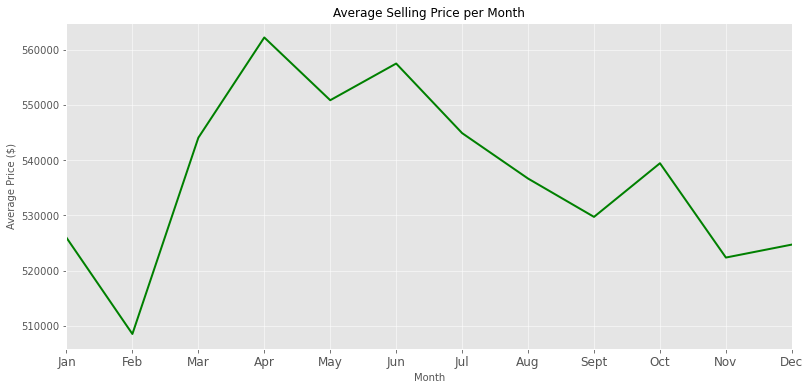

In [36]:
# creating a graph of average price per month to visualize if there's a trend
df.sort_values(by='month_sold', ascending=True)
months = sorted(df['month_sold'].unique())
# getting the average price for each month
avg_price = df.groupby('month_sold')['price'].mean()

# instantiating plot
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(13,6))
ax.plot(months, avg_price, color='green')
# setting title and axis labels
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Average Price ($)', fontsize=10)
ax.set_title('Average Selling Price per Month', fontsize=12)
# setting month labels
ax.set_xlim(1, 12)
ax.set_xticks((1,2,3,4,5,6,7,8,9,10,11,12))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], fontsize=12)


February indicates very low sales prices. Whilst May-June generate highest prices.

#### Hypotheses. ANOVA test -  month_sold and price

We want to test how each month impacts the prices of properties sold.

Null Hypothesis: No relationship between features and target variable, price.

Alternative Hypothesis: There is relationship between our features and our target variable, price.

Significance level (alpha) of 0.05 to determine.

In [37]:
# creating a sample measurement for each month, using the month value as the first argument, and price as the continuous variable
jan = df.loc[df['month_sold'] == 1, 'price']
feb = df.loc[df['month_sold'] == 2, 'price']
mar = df.loc[df['month_sold'] == 3, 'price']
apr = df.loc[df['month_sold'] == 4, 'price']
may = df.loc[df['month_sold'] == 5, 'price']
jun = df.loc[df['month_sold'] == 6, 'price']
jul = df.loc[df['month_sold'] == 7, 'price']
aug = df.loc[df['month_sold'] == 8, 'price']
sep = df.loc[df['month_sold'] == 9, 'price']
otb = df.loc[df['month_sold'] == 10, 'price']
nov = df.loc[df['month_sold'] == 11, 'price']
dec = df.loc[df['month_sold'] == 12, 'price']

# using scipy function f_oneway to conduct an ANOVA test for the f-statistic
sp.stats.f_oneway(jan,feb,mar,apr,may,jun,jul,aug,sep,otb,nov,dec)

F_onewayResult(statistic=3.0692820292498273, pvalue=0.0003984321988882857)

Output:

* f-statistic: 3.06928 

* p-value: 0.00039

F-value suggests significant variance between mean price for each month is pretty high. P-value to reject null hypothesis, each month sees different selling prices for each house.

Month sold therefore impacts how much a property can sell for.


##### Feature 2: Age of property

Assess relationship between price and age of property.

In [38]:
# subtracting 'yr_built' with the current year
df['age'] = 2022 - df['yr_built']


In [39]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,month_sold,age
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1955,10,67
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1951,12,71
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,1933,2,89
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1965,12,57
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1987,2,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,2009,5,13
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2014,2,8
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,2009,6,13
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,2004,1,18


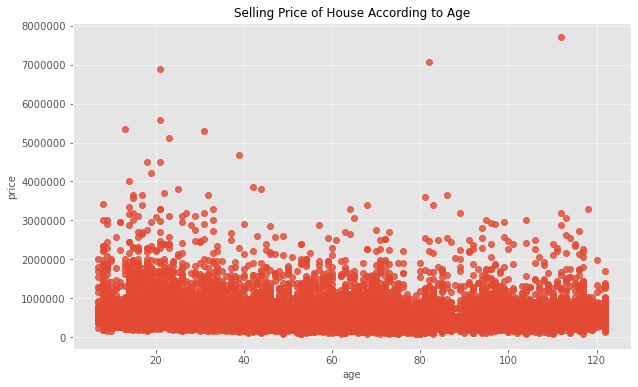

In [40]:
# Age of building vs price

fig, ax = plt.subplots(figsize=(10,6))
plt.style.use('bmh')
sns.regplot(data=df, x='age', y='price')

ax.set_xlabel('age', fontsize=10)
ax.set_ylabel('price', fontsize=10)
ax.set_title('Selling Price of House According to Age', fontsize=12)
ax.ticklabel_format(style='plain')

No visible relationships

In [41]:
# Find other correlations other than correlations with price

df.corr()['price'].sort_values()

age           -0.053999
month_sold    -0.009952
condition      0.036017
yr_built       0.053999
sqft_lot       0.089883
floors         0.256820
waterfront     0.264310
bedrooms       0.316790
view           0.393509
bathrooms      0.525934
grade          0.667982
sqft_living    0.701949
price          1.000000
Name: price, dtype: float64

#### Business Question Results

1. Do houses sell for more money when they have more living pace?
* Yes

2. Do houses with higher total property size sell for more?
* No

3. On average, what is the most profitable month to sell a house?
* The least profitable on average in February. Meanwhile, it's on average the most profitable to sell a house in April to June.

#### Modeling with Train-test Split:

Now that we have created six new features, let's begin the modeling process!

Before we create our model, we need to split the housing data apart. We do this split early on to avoid data-leakage, which would prevent us from being influenced while making decisions about the model.
The 'train set' will be used to fit the model to our data.
The 'test set' will simulate new and unseen data, which we will disregard until the end of the analysis.
Another reason we do this is because a model's prediction capability relies on independent test data. Ultimately, this practice gives us a measure of the quality of the ultimately chosen model.
We can easily perform a test-train split with a built-in function in sklearn

##### Train-test split of data:

In [42]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test")

17275 train + 4319 test


##### Variables x_train, y_train, x_test and y_test:

In [43]:
# only keeping features
X = df.drop('price', axis = 1)

# split target variable, which we're trying to predict
y = df['price']

In [44]:
# performing the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

### Baseline model

Find worst fit to compare real models against it later.

In [45]:
# fitting the baseline model to the training set and generating a score (r-squared)
dummy = DummyRegressor()
dummy.fit(X_train, y_train)
dummy.score(X_train, y_train)

# we get an r-squared of 0, because we're predictng using NO features
# dummy models are more useful for looking at the RMSE, so let's check that out

0.0

In [46]:
# using the baseline model to predict the y_train data
y_pred = dummy.predict(X_train)
y_pred

array([541332.64019759, 541332.64019759, 541332.64019759, ...,
       541332.64019759, 541332.64019759, 541332.64019759])

In [47]:
dummy_rmse = mean_squared_error(y_train, y_pred, squared=False)
dummy_rmse

370008.74126035336

The RSME here can be interpreted as the amount on average a data point differs from the line of best fit. This value is in units of the y variable so in our case the price of the house will differ from the predicted value on average of 370,000 dollars. That's really bad, but it makes sense! Because it's a dummy model.

### Model 1

Because this is the first iteration, I'm just using any features that I'm interested in. After it's fit and predicted on, then i'll use feature selection to specifically add/drop features.

First, I will be generating the model with statsmodels to be able to easily see values like the R-Squared and feature coefficients.
After that, I will use sklearn to fit the model to the training data. From there, we can predict on y and generate an RMSE for how the model performs on the training data.
From there, we can do a similar transform & predict procedure on the testing data and generate an RMSE.
With the RMSE of how the model performs on the training and testing sets, we can determine whether the model is underfit or overfit.

In [48]:
# generating model with statsmodels
first_model = ols(formula='price~bedrooms+bathrooms+sqft_living+floors+waterfront+view+condition+grade+month_sold+age', 
                data=train_set).fit()
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     3239.
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        18:41:34   Log-Likelihood:            -2.3684e+05
No. Observations:               17275   AIC:                         4.737e+05
Df Residuals:                   17264   BIC:                         4.738e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.031e+06   1.99e+04    -51.761      0.000   -1.07e+06   -9.92e+05
bedrooms     -4.25e+04   2380.018    -17.857      0.000   -4.72e+04   -3.78e+04
bathrooms    5.121e+04   3864.619     13.250      0.000    4.36e+04    5.88e+04
sqft_living   167.9184      3.665     45.819      0.000     160.735     175.102
floors       2.517e+04   3843.740      6.549      0.000    1.76e+04    3.27e+04
waterfront    5.92e+05   2.23e+04     26.529      0.000    5.48e+05    6.36e+05
view         4.492e+04   2486.686     18.066      0.000       4e+04    4.98e+04
condition    1.995e+04   2781.104      7.175      0.000    1.45e+04    2.54e+04
grade        1.266e+05   2410.137     52.539      0.000    1.22e+05    1.31e+05
month_sold  -3054.5520    532.686     -5.734      0.000   -4098.671   -2010.433
age          3696.4268     74.863     49.376      0.000    3549.688    3843.165
==============================================================================
Omnibus:                    12857.379   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           849927.214
Skew:                           2.988   Prob(JB):                         0.00
Kurtosis:                      36.839   Cond. No.                     3.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-Squared .652, good indicator as close to 1.

#### Model into training data

With sklean, we can easily fit the model and perform the prediction on 'y' aka the price column.

In [49]:
# setting 'X_train_1' to the features I want to fit in this first model
X_train_1 = X_train[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade', 'month_sold', 'age']]

# instantiate LinearRegression to use
# coefficients are learnt and stored in 'model_1'
model_1 = LinearRegression()
model_1.fit(X_train_1, y_train)

LinearRegression()

#### Now let's use 'X_train_1' to predict y for this training data:

In [50]:
# predicting on the y (price) for train_set
y_pred = model_1.predict(X_train_1)

#### Evaluate training predictions using RMSE:

In [51]:
# get the RMSE for the train set
model_1_rsme = mean_squared_error(y_train, y_pred, squared=False)
model_1_rsme

217761.26478130033

#### Using the model to transform & predict on the testing set:

In [52]:
# transforming and .predict on the test_set

X_test_1 = X_test[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade', 'month_sold', 'age']]

# feeding in the training data because this is a transformation
testing_model_1 = LinearRegression().fit(X_train_1, y_train)

In [53]:
y_pred_test = testing_model_1.predict(X_test_1)

In [54]:
# getting R-Squared for testing_model_1
testing_model_1.score(X_test_1, y_test)


0.6503152125150762

Slightly deteriorated as traning sets r-squared 0.652

In [55]:
# get the RMSE for the test set
testing_model_1_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
testing_model_1_rmse

212513.88350096633

#### Using the model to transform & predict on the testing set:

In [56]:
print('Training Root Mean Squared Error:' , model_1_rsme)
print('Testing Root Mean Squared Error:' , testing_model_1_rmse)

Training Root Mean Squared Error: 217761.26478130033
Testing Root Mean Squared Error: 212513.88350096633


When the RMSE decreases between the training and testing set, that means this model may be underfit. In this case, the RMSE did decrease from 22776 to 212513 when transformed & predicted on the test data.

### Feature Selection

When the first model was used to predict on the y-test data, it produced an RMSE of 221353. Although this isn't too high, it's not the best. Considering that the baseline model produced an RMSE of 370000, the first model didnt perform that much better.

We'll use feature selection to create another iteration of the model, and try to improve the RMSE.

#### Check for Multicoollinearity

In [57]:
# creating a numerical correlation matrix
corr_matrix = X_train_1.corr().abs()
corr_matrix

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,month_sold,age
bedrooms,1.000000,0.530387,0.592688,0.187754,0.004002,0.081313,0.026666,0.364918,0.002799,0.160535
bathrooms,0.530387,1.000000,0.756289,0.500470,0.070222,0.186128,0.120634,0.663816,0.007901,0.505471
sqft_living,0.592688,0.756289,1.000000,0.353782,0.106753,0.278521,0.060053,0.761849,0.009773,0.318037
floors,0.187754,0.500470,0.353782,1.000000,0.027203,0.031178,0.264061,0.458870,0.016030,0.489119
waterfront,0.004002,0.070222,0.106753,0.027203,1.000000,0.381840,0.013112,0.085311,0.009891,0.019676
view,0.081313,0.186128,0.278521,0.031178,0.381840,1.000000,0.048815,0.246375,0.008519,0.057458
condition,0.026666,0.120634,0.060053,0.264061,0.013112,0.048815,1.000000,0.148864,0.014675,0.361274
grade,0.364918,0.663816,0.761849,0.458870,0.085311,0.246375,0.148864,1.000000,0.009033,0.446322
month_sold,0.002799,0.007901,0.009773,0.016030,0.009891,0.008519,0.014675,0.009033,1.000000,0.002299
age,0.160535,0.505471,0.318037,0.489119,0.019676,0.057458,0.361274,0.446322,0.002299,1.000000


C:\Users\AnnieLiu\AppData\Local\Temp/ipykernel_140616/719838915.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


Text(0.5, 1.0, 'Model 1 Correlation Matrix')

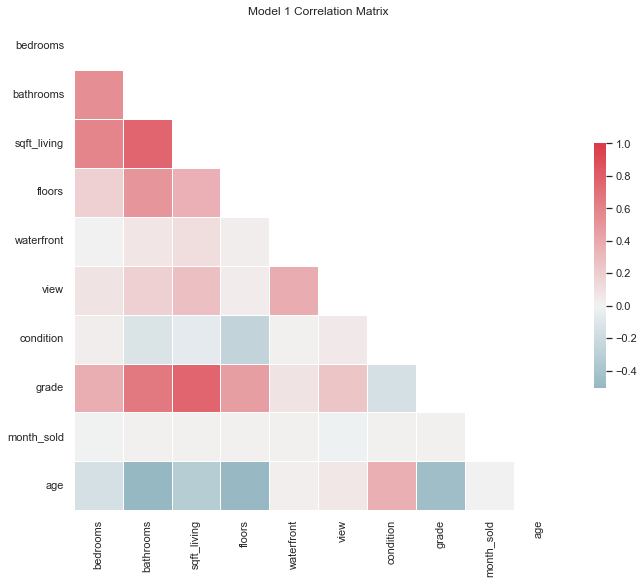

In [58]:
# creating a correlation heatmap, to easily visualize high correlations and refer back to the numerical matrix
sns.set(style="white")
# compute the correlation matrix
corr = X_train_1.corr()
# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Model 1 Correlation Matrix')


In [59]:
df.corr()['grade'].sort_values()

age           -0.447837
condition     -0.146853
month_sold     0.009043
waterfront     0.082814
sqft_lot       0.114715
view           0.249066
bedrooms       0.367654
yr_built       0.447837
floors         0.458857
bathrooms      0.665944
price          0.667982
sqft_living    0.762869
grade          1.000000
Name: grade, dtype: float64

From the correlation matrix, it looks like the feature with the most correlation issues is grade. That feature has two of the highest correlation coefficients.

correlation of .76 with sqft_living
correlation of .66 with bathrooms

Let's try dropping grade completely for the next model iteration and see if there's any changes.

### Model 2

This model is same as first but without grade feature.

In [60]:
## fitting the model to the training data:
# setting 'X_train_2' to the features I want to fit in this first model
X_train_2 = X_train[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'month_sold', 'age']]

# instantiate LinearRegression to use
# coefficients are learnt and stored in 'model_2'
model_2 = LinearRegression()
model_2.fit(X_train_2, y_train)

## predicting on the y (price) for train_set
y_pred = model_2.predict(X_train_2)

# get the RMSE for the train_set
model_2_rsme = mean_squared_error(y_train, y_pred, squared=False)
model_2_rsme

234028.70822660028

In [61]:
## transforming and .predict on the test_set
X_test_2 = X_test[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'month_sold', 'age']]

testing_model_2 = LinearRegression().fit(X_train_2, y_train)

## predicting on the y (price) for test_set
y_pred_test = testing_model_2.predict(X_test_2)

# get the RMSE for the test_set
testing_model_2_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
testing_model_2_rmse

229364.38899539088

In [62]:
# compairing Model 1 and Model 2
print('Model 1 Testing RMSE:' , testing_model_1_rmse)
print('Model 2 Testing RMSE:' , testing_model_2_rmse)

Model 1 Testing RMSE: 212513.88350096633
Model 2 Testing RMSE: 229364.38899539088


So the RMSE got slightly higher. So we'll go back to model 1.

### Model evaluation

Let's print the testing RMSE for all the models and check whether they are overfit or underfit, and determine the best model overall.

In [63]:
# baseline Model
print('Baseline Model RMSE:', dummy_rmse, '\n')
# training RMSEs
print('Training RMSE:')
print('Model 1:', model_1_rsme)
print('Model 2:', model_2_rsme)

# testing RMSEs
print('Testing RMSE:')
print('Model 1:', testing_model_1_rmse)
print('Model 2:', testing_model_2_rmse)

# overfit or underfit
print('Are the models overfit or underfit?')
# model 1
if model_1_rsme < testing_model_1_rmse:
    print('Model 1 is overfit')
elif model_1_rsme > testing_model_1_rmse:
    print('Model 1 is underfit')
# model 2
if model_2_rsme < testing_model_2_rmse:
    print('Model 2 is overfit')
elif model_2_rsme > testing_model_2_rmse:
    print('Model 2 is underfit')


Baseline Model RMSE: 370008.74126035336 

Training RMSE:
Model 1: 217761.26478130033
Model 2: 234028.70822660028
Testing RMSE:
Model 1: 212513.88350096633
Model 2: 229364.38899539088
Are the models overfit or underfit?
Model 1 is underfit
Model 2 is underfit


Model 1 performed best on testing data. We will apply that on our df dataset.

### Refitting final model to df dataset

In [64]:
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade', 'month_sold', 'age']]

In [65]:
# price column of whole dataset
target = df.price

In [66]:
# instantiating final model
final_model = LinearRegression()

# fit the linear regression to the data
final_model = final_model.fit(features,target)

In [67]:
# checking final model coefficients
final_model.coef_

array([-4.18464718e+04,  4.95338586e+04,  1.68514939e+02,  2.61137933e+04,
        6.11076273e+05,  4.50440847e+04,  1.87760481e+04,  1.25157552e+05,
       -2.74254404e+03,  3.67030060e+03])

### Final model

In [68]:
features

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,month_sold,age
0,3,1.00,1180,1.0,0.0,0.0,3,7,10,67
1,3,2.25,2570,2.0,0.0,0.0,3,7,12,71
2,2,1.00,770,1.0,0.0,0.0,3,6,2,89
3,4,3.00,1960,1.0,0.0,0.0,5,7,12,57
4,3,2.00,1680,1.0,0.0,0.0,3,8,2,35
...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,3.0,0.0,0.0,3,8,5,13
21593,4,2.50,2310,2.0,0.0,0.0,3,8,2,8
21594,2,0.75,1020,2.0,0.0,0.0,3,7,6,13
21595,3,2.50,1600,2.0,0.0,0.0,3,8,1,18


In [75]:
features.to_csv('housing_features.csv')

In [69]:
# setting the pickle file as 'model'

pickle_out = open("model.pickle","wb")
pickle.dump(final_model, pickle_out)
pickle_out.close()

In [70]:
final_model = pickle.load(open('model.pickle', 'rb'))

In [71]:
#Prediction from features

prediction = final_model.predict(features)

In [72]:
# Export predictions

prediction = pd.DataFrame(prediction, columns=['predictions'])

In [73]:
prediction.head()

,predictions
0,280607.210322
1,612070.206758
2,230891.970563
3,464634.110380
4,444046.823607


In [74]:
prediction.to_csv('housing_predictions.csv')